In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['500_Person_Gender_Height_Weight_Index.csv']


In [2]:
input="../input/500_Person_Gender_Height_Weight_Index.csv"
df=pd.read_csv(input)

In [3]:
df.columns=['Gender','Height','Weight','Health']

In [4]:
df.head()

,Gender,Height,Weight,Health
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Gender    500 non-null object
Height    500 non-null int64
Weight    500 non-null int64
Health    500 non-null int64
dtypes: int64(3), object(1)
memory usage: 15.7+ KB


All values are non null every feature has value in every column

Let's find the dependence of the Values

In [6]:
corr=df.corr()
corr

,Height,Weight,Health
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Health,-0.422223,0.804569,1.000000


Index feature is not an int but rather a string feature as it describes the health of the specific person<br>
Index : 0 - Extremely Weak 1 - Weak 2 - Normal 3 - Overweight 4 - Obesity 5 - Extreme Obesity

In [7]:
def healthy(x):
    if(x==0):
        return "Extremely Weak"
    elif(x==1):
        return "Weak"
    elif(x==2):
        return "Normal"
    elif(x==3):
        return "OverWeight"
    elif(x==4):
        return "Obesity"
    else:
        return "Extreme Obesity"
    
    
df["Health"]=df['Health'].apply(healthy)

In [8]:
df.head()

,Gender,Height,Weight,Health
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,OverWeight
4,Male,149,61,OverWeight


There is maximum dependence of weight on Health

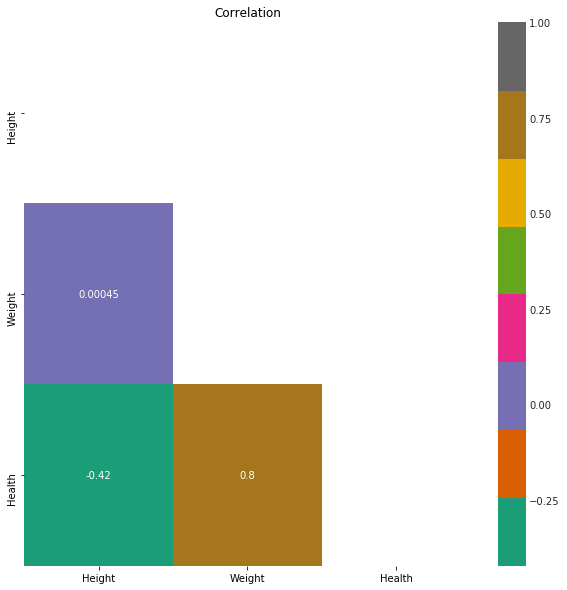

In [9]:
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
fig,ax = plt.subplots(figsize=(10, 10))
with sns.axes_style("white"):
    sns.heatmap(corr,mask=mask,cmap="Dark2",annot=True)
    plt.title("Correlation")
    plt.show()

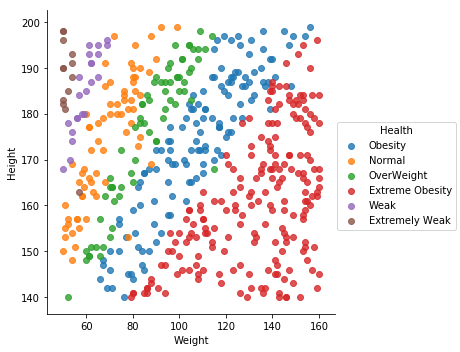

In [10]:
sns.lmplot(data=df,x="Weight",y="Height",fit_reg=False,hue="Health") ## Hue is for differentiating between healths
#this is seaborn's inbuilt scatter function

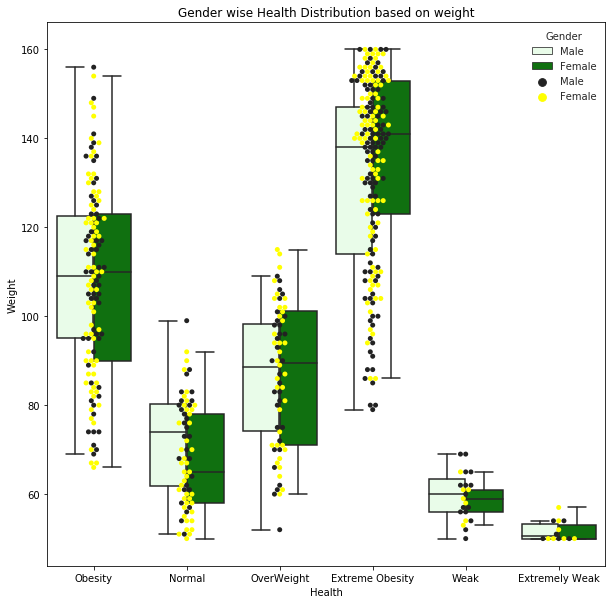

In [11]:
fig,ax = plt.subplots(figsize=(10, 10))
with sns.axes_style("white"):
    sns.boxplot(data=df,x='Health',y='Weight',hue='Gender',color="Green")
    sns.swarmplot(data=df,x='Health',y='Weight',hue='Gender',color="Yellow")
    plt.title("Gender wise Health Distribution based on weight")
    plt.plot()

As found from correlation Weight seems to have an almost linear relation with Health

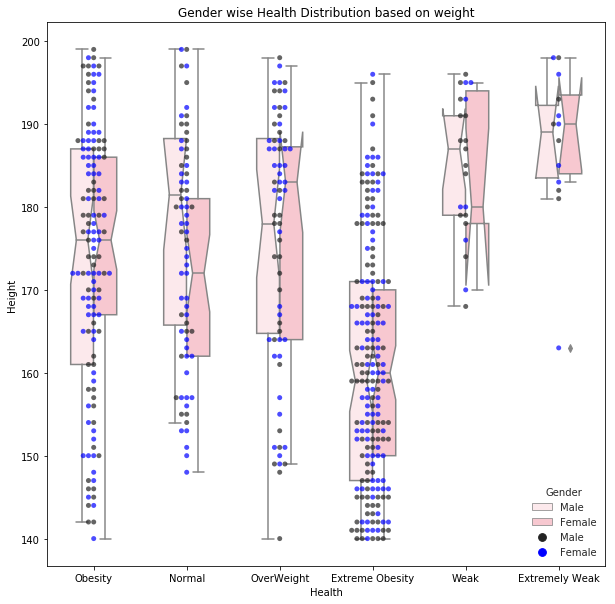

In [12]:
fig,ax = plt.subplots(figsize=(10, 10))
with sns.axes_style("white"):
    sns.boxplot(data=df,x='Health',y='Height',hue='Gender',color="Pink",notch=True,width=.5)
    sns.swarmplot(data=df,x='Health',y='Height',hue='Gender',color="Blue",alpha=.7)
    plt.title("Gender wise Health Distribution based on weight")
    plt.plot()

Height Seems to have no direct relation from Health, also found from the correlation heat map


Lets make parameter BMI defined as 

BMI is Body mass Index, defined by 

\begin{eqnarray*}
BMI\ is\ Body\ Mass\ Index,\ defined\ by \cr \cr
BMI= Weight / Height (in\ m)\ ^{2}
\end{eqnarray*}


In [13]:
df["BMI"]=df['Weight']/(df['Height']/100)**2

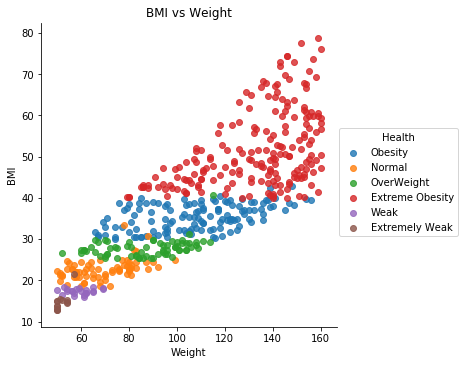

In [14]:
sns.lmplot(data=df,x="Weight",y="BMI",fit_reg=False,hue="Health") ## Hue is for differentiating between healths
plt.title("BMI vs Weight")
plt.show()

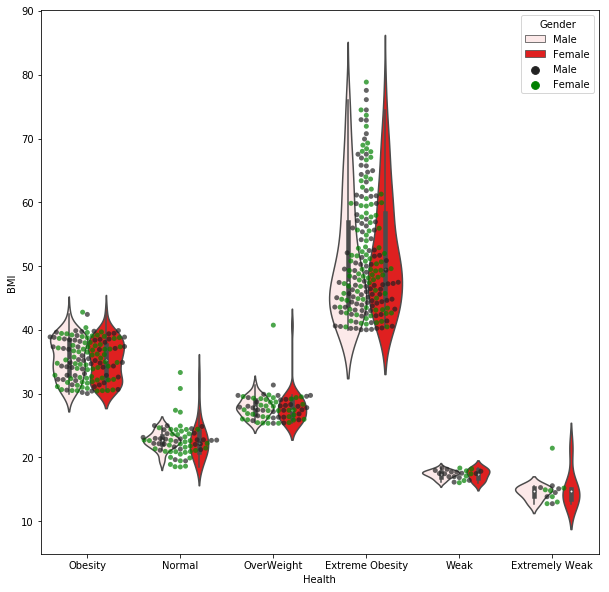

In [15]:
fig=plt.subplots(figsize=(10,10))
sns.violinplot(data=df,y="BMI",x="Health",hue="Gender",color="Red")
sns.swarmplot(data=df,x='Health',y='BMI',hue='Gender',color="Green",alpha=.7) ##transparency
plt.show()

As you can see healthy people with higher value in Health tend to have higher BMI

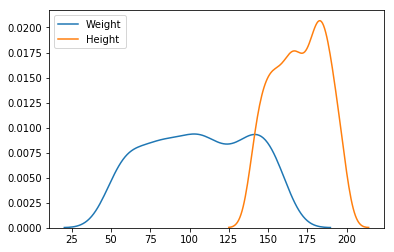

In [16]:
sns.kdeplot(df.Weight)
sns.kdeplot(df.Height)

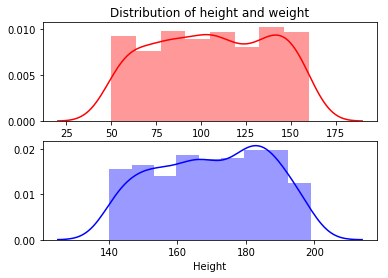

In [17]:
#sns.distplot(df.BMI,color="Red")
plt.subplot(2,1,1)
plt.title("Distribution of height and weight")
sns.distplot(df.Weight,color="Red")
plt.subplot(2,1,2)
sns.distplot(df.Height,color="Blue")

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

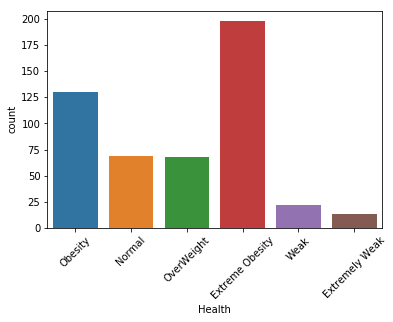

In [18]:
sns.countplot(x="Health",data=df)
plt.xticks(rotation=45)

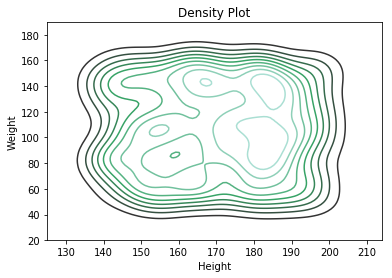

In [19]:
plt.title("Density Plot")
sns.kdeplot(df.Height,df.Weight)

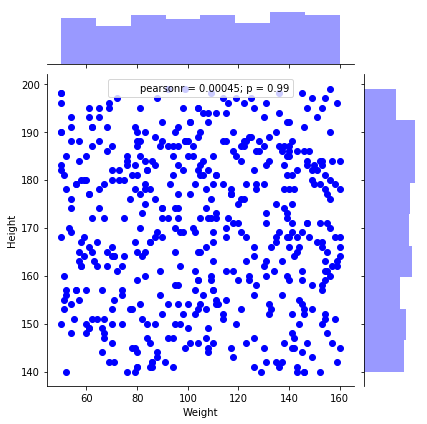

In [20]:
sns.jointplot(x='Weight',y='Height',data=df,color="Blue")